# Exercise 10

In this Jupyter Notebook I tried to improve the results of the travelling salesman problem solver implemented for the exercise 9. <br>
Using MPI (Message Passing Interface) libraries I created 6 (only 6 because my laptop has 8 core) "continents" with different populations that try to "evolve" generation after generation to reach the best path. For the first simulation the continets were able to communicate and exchange the best path each others, instead for the second one they are isolated.

In [1]:
import matplotlib
import time
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from scipy.optimize import curve_fit
from IPython.display import clear_output
from matplotlib import cm

## <span style="color:green"> Communicating </span>

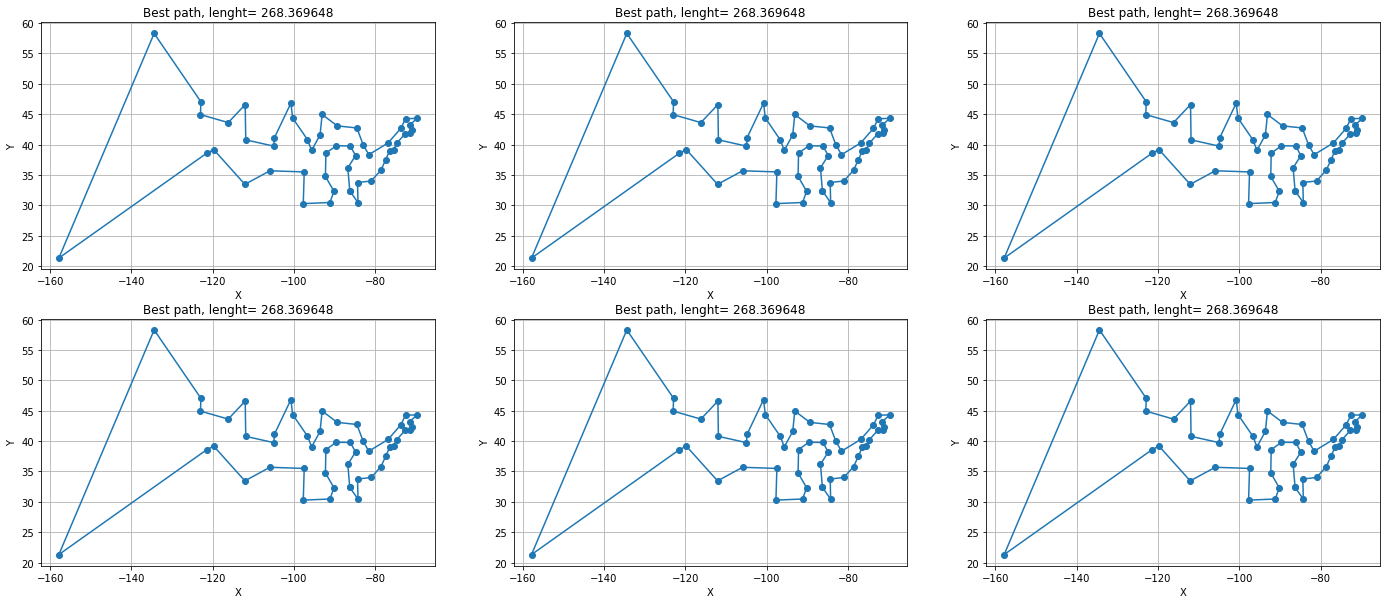

In [2]:
path_bests = np.array([
    "Communicating/output" + str(i) + ".out"
    for i in range(0,6)
])

x_bests = np.array([
    np.loadtxt(path_bests[i], usecols=(1),unpack=True)
    for i in range(len(path_bests))
])

y_bests = np.array([
    np.loadtxt(path_bests[i], usecols=(2),unpack=True)
    for i in range(len(path_bests))
])

lenghts = np.zeros(len(path_bests))
    
for j in range(len(lenghts)):
    for i in range(len(x_bests[1])-1):
        lenghts[j] += math.sqrt((x_bests[j][i]-x_bests[j][i+1])**2 + (y_bests[j][i]-y_bests[j][i+1])**2)
    
fig, plots= plt.subplots(2,3, figsize=(24,10))

plots = plots.ravel()

for i in range(6):
    plots[i].plot(x_bests[i],y_bests[i],marker="o")
    plots[i].grid(True)
    plots[i].set_xlabel("X")
    plots[i].set_ylabel("Y")
    plots[i].set_title("Best path, lenght= %f" %lenghts[i])


In this case we allowed each continent (ie each core) to have its best migrate to another continent (changing core) every 5 generations. We cannot be completely sure that we have found the shortest path, but it is by far shorter than every one we did found when every core could not comunicate with one another.

## <span style="color:green"> Not Communicating </span>

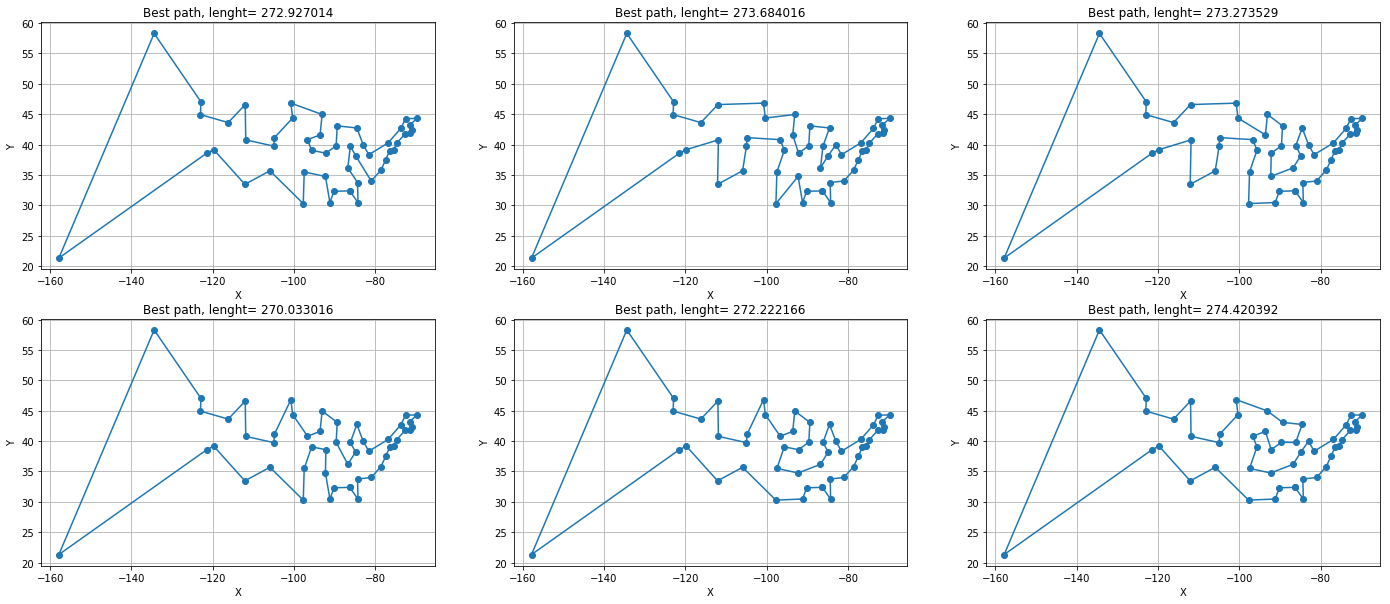

In [3]:
path_bests = np.array([
    "Silent/output" + str(i) + ".out"
    for i in range(0,6)
])

x_bests = np.array([
    np.loadtxt(path_bests[i], usecols=(1),unpack=True)
    for i in range(len(path_bests))
])

y_bests = np.array([
    np.loadtxt(path_bests[i], usecols=(2),unpack=True)
    for i in range(len(path_bests))
])

lenghts = np.zeros(len(path_bests))
    
for j in range(len(lenghts)):
    for i in range(len(x_bests[1])-1):
        lenghts[j] += math.sqrt((x_bests[j][i]-x_bests[j][i+1])**2 + (y_bests[j][i]-y_bests[j][i+1])**2)
    
fig, plots= plt.subplots(2,3, figsize=(24,10))

plots = plots.ravel()

for i in range(6):
    plots[i].plot(x_bests[i],y_bests[i],marker="o")
    plots[i].grid(True)
    plots[i].set_xlabel("X")
    plots[i].set_ylabel("Y")
    plots[i].set_title("Best path, lenght= %f" %lenghts[i])

In this case at the end each continent has a different shortest path and none of the is as short as the one we found when different continent could communicate woth each other. Without communication each continent probably finds nly a local minimum. This shows that a correct implementation of the MPI libraries permit to reach better results.